IPNYB for the plots in the thesis, especially for Chapter 4


In [14]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

In [2]:
from stareg import Bspline

MEEEE and Moooooo and asdasdasd


## Peak Example for Chapter 4

In [135]:
savePath = os.path.join(os.path.dirname("."), '../../Thesis/tex/graphics/data/cha4/peak_example/')
print("Generate linspace some data")
np.random.seed(2)
n_data = 200
#x = np.random.random(n_data)*10
x = np.linspace(0.1,0.8,n_data)
ytrue = 2*np.exp(-(x-0.35)**2/0.01)
noise = np.random.normal(loc=0, scale=0.1, size=x.shape)
y = ytrue + noise

# train-test split
print("Perform train-test split")
df = pd.DataFrame(data=dict(x=x, y=y, ytrue=ytrue))
df_train, df_test = train_test_split(df)

Generate linspace some data
Perform train-test split


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1234.16it/s]

Fit the different spline types
Optimal lambda =  3.6783797718286344


========Pre-Iteration=========
-------MSE = 0.0110801--------
======== Iteration 1 =========
-------MSE = 0.6473636--------
======== Iteration 2 =========
-------MSE = 0.6473636--------
Show the mean squared errors
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
MSEs compared to True Function
        Validation Set        
MSE-Val B-spline =        0.005977
MSE-Val P-spline =        0.001541
MSE-Val SC-P-spline =     0.925981
          Train Set           
---Prediction for 1-D Data----
MSE-Train B-spline =      0.002697
---Prediction for 1-D Data----
MSE-Train P-spline =      0.001227
---Prediction for 1-D Data----
MSE-Train SC-P-spline =   0.641471
MSEs compared to Noisy Function
        Validation Set        
MSE-Val B-spline =        0.018768
MSE-Val P-spline =        0.012168
MSE-Val SC-P-spline =     0.932286
          Train set           
---Prediction for 1-D Data----
MSE-Train B-spline =      0.009351
---Prediction for 1-D Data----


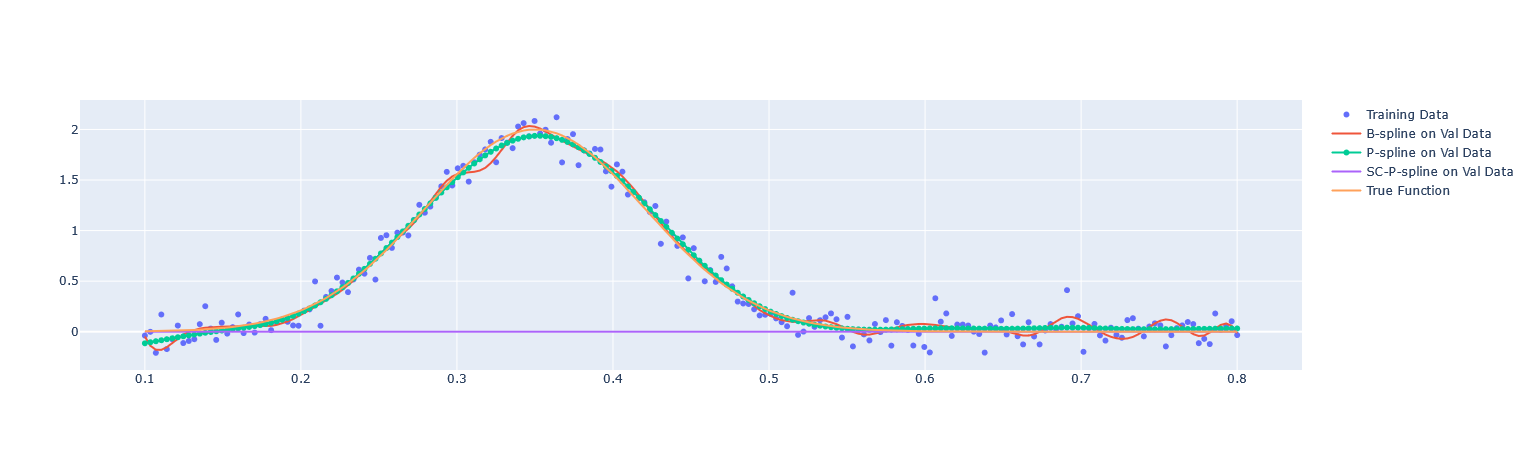

In [136]:
print("Fit the different spline types")
nr_splines, knot_type, spline_order, lam_c = 35, "e", 3, 6000
B = Bspline()
sol = B.fit(df_train["x"].values, df_train["y"].values, nr_splines=nr_splines)
opt_lam = B.calc_GCV(df_train["x"].values, df_train["y"].values,nr_splines=nr_splines, nr_lam=100, plot_=0)["best_lambda"]
print("Optimal lambda = ",opt_lam)
sol_p = B.fit_Pspline(df_train["x"].values, df_train["y"].values,nr_splines=nr_splines,lam=opt_lam)
sol_c = B.fit_SC_Pspline(df_train["x"].values, df_train["y"].values, "peak", nr_splines, lam_c=lam_c)

print("Show the mean squared errors")
Bspline_pred = B.predict(df_test["x"].values, sol["coef_"], sol["knots"])
Pspline_pred = B.predict(df_test["x"].values, sol_p["coef_"], sol_p["knots"])
SCPspline_pred = B.predict(df_test["x"].values, sol_c["coef_"], sol_c["knots"])

print("".center(50,"="))
print("".center(50,"="))
print("MSEs compared to True Function")
print("".center(50,"="))
print("Validation Set".center(30, " "))
print("MSE-Val B-spline = ".ljust(25), mean_squared_error(df_test["ytrue"].values, Bspline_pred).round(6))
print("MSE-Val P-spline = ".ljust(25), mean_squared_error(df_test["ytrue"].values, Pspline_pred).round(6))
print("MSE-Val SC-P-spline = ".ljust(25), mean_squared_error(df_test["ytrue"].values, SCPspline_pred).round(6))
print("".center(50,"="))
print("Train Set".center(30, " "))
print("MSE-Train B-spline = ".ljust(25), mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol["coef_"], sol["knots"])).round(6))
print("MSE-Train P-spline = ".ljust(25), mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol_p["coef_"], sol_p["knots"])).round(6))
print("MSE-Train SC-P-spline = ".ljust(25), mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol_c["coef_"], sol_c["knots"])).round(6))
print("".center(50,"="))
print("MSEs compared to Noisy Function")
print("".center(50,"="))
print("Validation Set".center(30, " "))
print("MSE-Val B-spline = ".ljust(25), mean_squared_error(df_test["y"].values, Bspline_pred).round(6))
print("MSE-Val P-spline = ".ljust(25), mean_squared_error(df_test["y"].values, Pspline_pred).round(6))
print("MSE-Val SC-P-spline = ".ljust(25), mean_squared_error(df_test["y"].values, SCPspline_pred).round(6))
print("".center(50,"="))
print("Train set".center(30, " "))
print("MSE-Train B-spline = ".ljust(25), mean_squared_error(df_train["y"].values, B.predict(df_train["x"].values, sol["coef_"], sol["knots"])).round(6))
print("MSE-Train P-spline = ".ljust(25), mean_squared_error(df_train["y"].values, B.predict(df_train["x"].values, sol_p["coef_"], sol_p["knots"])).round(6))
print("MSE-Train SC-P-spline = ".ljust(25), mean_squared_error(df_train["y"].values, B.predict(df_train["x"].values, sol_c["coef_"], sol_c["knots"])).round(6))
print("".center(50,"="))

# add the predictions to the dataset and save it
xplot = np.linspace(0.1,0.8,200)
Bspline_plot = B.predict(xplot, sol["coef_"], sol["knots"])
Pspline_plot = B.predict(xplot, sol_p["coef_"], sol_p["knots"])
SCPspline_plot = B.predict(xplot, sol_c["coef_"], sol_c["knots"])

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="Training Data"))
fig.add_trace(go.Scatter(x=xplot, y=Bspline_plot, mode="lines", name="B-spline on Val Data"))
fig.add_trace(go.Scatter(x=xplot, y=Pspline_plot, mode="lines+markers", name="P-spline on Val Data"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot, mode="lines", name="SC-P-spline on Val Data"))
fig.add_trace(go.Scatter(x=x, y=ytrue, mode="lines", name="True Function"))
fig.show()

df_mse = pd.DataFrame(columns=["Model", "MSEVal", "MSEValTrueFunction"])
df_mse["Model"] = ["B-spline", "P-spline", "SCP-spline"]
df_mse["MSEValTrueFunction"] = [
    mean_squared_error(df_test["ytrue"].values, Bspline_pred).round(6),
    mean_squared_error(df_test["ytrue"].values, Pspline_pred).round(6),
    mean_squared_error(df_test["ytrue"].values, SCPspline_pred).round(6)]
df_mse["MSEVal"] = [
    mean_squared_error(df_test["y"].values, Bspline_pred).round(6),
    mean_squared_error(df_test["y"].values, Pspline_pred).round(6),
    mean_squared_error(df_test["y"].values, SCPspline_pred).round(6)
]

df_info = pd.DataFrame(columns=["Info", "Value"])
df_info["Info"] = ["Nr_splines", "Knot_type", "Spline_Order", "Opt_Lambda", "Lambda_c"]
df_info["Value"] = [nr_splines, knot_type, spline_order, opt_lam, lam_c]

df_plot = pd.DataFrame(data=dict(xplot=xplot, yplot=y, ytrue=ytrue,
                                Bspline_fit=Bspline_plot,
                                Pspline_fit=Pspline_plot,
                                SCP_spline_fit=SCPspline_plot))
#df_info.to_csv(savePath+"info.txt", sep=" ", index=False)
#df_mse.to_csv(savePath+"mse.csv", sep=",", index=False)
#df_plot.to_csv(savePath+"data.txt", sep=" ", index=0)

## Peak example for different $\lambda_c$ for Chapter 4

Generate some data for the experiment: Different Lambdas


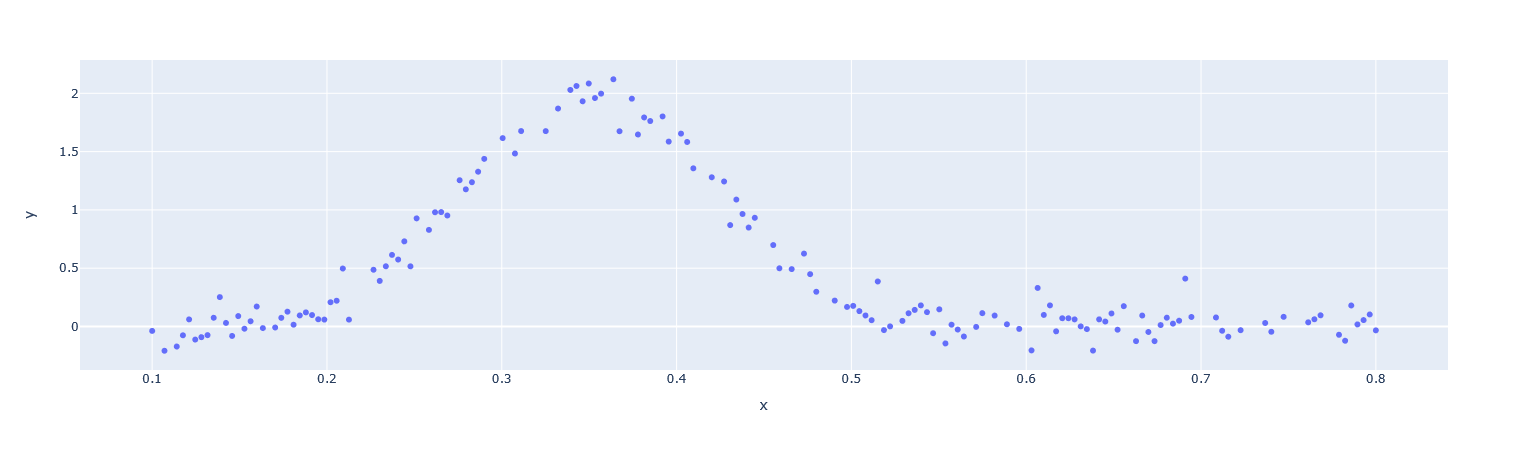

In [235]:
savePath = os.path.join(os.path.dirname("."), '../../Thesis/tex/graphics/data/cha4/lambdas/')
print("Generate some data for the experiment: Different Lambdas")
np.random.seed(2)
n_data = 200
#x = np.random.random(n_data)*10
x = np.linspace(0.1,0.8,n_data)
ytrue = 2*np.exp(-(x-0.35)**2/0.01)
noise = np.random.normal(loc=0, scale=0.1, size=x.shape)
y = ytrue + noise

# train-test split
df = pd.DataFrame(data=dict(x=x, y=y, ytrue=ytrue))
df_train, df_test = train_test_split(df)

px.scatter(df_train, x="x", y="y")

In [269]:
print("Fit the different spline types")
nr_splines, knot_type, spline_order, lam_c = 45, "e", 3, 6000
B = Bspline()
# Calculate B-spline fit
sol = B.fit(df_train["x"].values, df_train["y"].values, nr_splines=nr_splines, knot_type=knot_type)
# Perform generalized cross-validation
opt_lam = B.calc_GCV(df_train["x"].values, df_train["y"].values,nr_splines=nr_splines, knot_type=knot_type, nr_lam=100, plot_=0)["best_lambda"]
print("Optimal lambda = ",opt_lam)
# Calculate optimal P-spline fit
sol_p = B.fit_Pspline(df_train["x"].values, df_train["y"].values,nr_splines=nr_splines,lam=opt_lam, knot_type=knot_type)
# Calculate the SC-P-spline fits
sol_c = {}
t_lam = [0,1,10,100,1000,10000,100000, int(1e6), int(1e7), int(1e10)]
for c in t_lam:
    sol_c["sol_c"+str(c)] = B.fit_SC_Pspline(df_train["x"].values, df_train["y"].values, "peak", nr_splines, lam_c=c, knot_type=knot_type)

 43%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 43/100 [00:00<00:00, 389.84it/s]

Fit the different spline types


 43%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 43/100 [00:00<00:00, 420.47it/s]

Optimal lambda =  7.742636826811277


 38%|███████████████████████████████████████████████████████████████████████▍                                                                                                                    | 38/100 [00:00<00:00, 339.39it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110116--------


 37%|█████████████████████████████████████████████████████████████████████▌                                                                                                                      | 37/100 [00:00<00:00, 368.95it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110141--------


 35%|█████████████████████████████████████████████████████████████████▊                                                                                                                          | 35/100 [00:00<00:00, 348.99it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110301--------


 43%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 43/100 [00:00<00:00, 419.85it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110643--------
======== Iteration 2 =========
-------MSE = 0.0110646--------


 34%|███████████████████████████████████████████████████████████████▉                                                                                                                            | 34/100 [00:00<00:00, 339.13it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110768--------
======== Iteration 2 =========
-------MSE = 0.0110792--------


 35%|█████████████████████████████████████████████████████████████████▊                                                                                                                          | 35/100 [00:00<00:00, 349.03it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110785--------
======== Iteration 2 =========
-------MSE = 0.0110812--------


 39%|█████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 39/100 [00:00<00:00, 382.45it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110786--------
======== Iteration 2 =========
-------MSE = 0.0110814--------


 42%|██████████████████████████████████████████████████████████████████████████████▉                                                                                                             | 42/100 [00:00<00:00, 418.63it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110786--------
======== Iteration 2 =========
-------MSE = 0.0110814--------


 32%|████████████████████████████████████████████████████████████▏                                                                                                                               | 32/100 [00:00<00:00, 319.13it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110786--------
======== Iteration 2 =========
-------MSE = 0.0110814--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 380.17it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110786--------
======== Iteration 2 =========
-------MSE = 0.0110814--------


In [264]:
print("Calculate predicted values for validation data.")
Bspline_pred = B.predict(df_test["x"].values, sol["coef_"], sol["knots"])
Pspline_pred = B.predict(df_test["x"].values, sol_p["coef_"], sol_p["knots"])
SCPspline_pred_c = dict()
for k,v in sol_c.items():
    SCPspline_pred_c[k.split("_")[-1]] = B.predict(df_test["x"].values, v["coef_"], v["knots"])

Calculate predicted values for validation data.
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----


In [12]:
r, lj =10, 30
print("".center(50,"="))
print("MSEs compared to True Function")
print("Validation Set".center(lj, " "))
print("".center(50,"="))
print("MSE-Val B-spline = ".ljust(lj), mean_squared_error(df_test["ytrue"].values, Bspline_pred).round(r))
print("MSE-Val P-spline = ".ljust(lj), mean_squared_error(df_test["ytrue"].values, Pspline_pred).round(r))
for k,v in SCPspline_pred_c.items():
    print(f"MSE-Val SC-P-spline {k} = ".ljust(lj), mean_squared_error(df_test["ytrue"].values, v).round(r))
print("".center(50,"="))

print("".center(50,"="))
print("MSEs compared to Noisy Function")
print("Validation Set".center(30, " "))
print("".center(50,"="))
print("MSE-Val B-spline = ".ljust(lj), mean_squared_error(df_test["y"].values, Bspline_pred).round(r))
print("MSE-Val P-spline = ".ljust(lj), mean_squared_error(df_test["y"].values, Pspline_pred).round(r))
for k,v in SCPspline_pred_c.items():
    print(f"MSE-Val SC-P-spline {k} = ".ljust(lj), mean_squared_error(df_test["y"].values, v).round(r))
print("".center(50,"="))

print("".center(50,"="))
print("MSEs compared to Noisy Function")
print("Train Set".center(lj, " "))
print("".center(50,"="))
print("MSE-Train B-spline = ".ljust(lj), 
      mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol["coef_"], sol["knots"])).round(r))
print("MSE-Train P-spline = ".ljust(lj), 
      mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol_p["coef_"], sol_p["knots"])).round(r))
for k,v in sol_c.items():
    print(f"MSE-Val SC-P-spline {k.split('_')[-1]} = ".ljust(lj), mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, v["coef_"], v["knots"])).round(r))
print("".center(50,"="))

MSEs compared to True Function
        Validation Set        


NameError: name 'Bspline_pred' is not defined

In [268]:
# calculate predictions on finer grid and plot it
xplot = np.linspace(df_train["x"].min(),df_train["x"].max(),200)
Bspline_plot = B.predict(xplot, sol["coef_"], sol["knots"])
Pspline_plot = B.predict(xplot, sol_p["coef_"], sol_p["knots"])
SCPspline_plot0 = B.predict(xplot, sol_c["sol_c0"]["coef_"], sol_c["sol_c0"]["knots"])
SCPspline_plot1 = B.predict(xplot, sol_c["sol_c1"]["coef_"], sol_c["sol_c1"]["knots"])
SCPspline_plot10 = B.predict(xplot, sol_c["sol_c10"]["coef_"], sol_c["sol_c10"]["knots"])
SCPspline_plot100 = B.predict(xplot, sol_c["sol_c100"]["coef_"], sol_c["sol_c100"]["knots"])
SCPspline_plot1000 = B.predict(xplot, sol_c["sol_c1000"]["coef_"], sol_c["sol_c1000"]["knots"])
SCPspline_plot10000 = B.predict(xplot, sol_c["sol_c10000"]["coef_"], sol_c["sol_c10000"]["knots"])
SCPspline_plot100000 = B.predict(xplot, sol_c["sol_c100000"]["coef_"], sol_c["sol_c100000"]["knots"])
SCPspline_plot1000000 = B.predict(xplot, sol_c["sol_c1000000"]["coef_"], sol_c["sol_c1000000"]["knots"])
SCPspline_plot10000000 = B.predict(xplot, sol_c["sol_c10000000"]["coef_"], sol_c["sol_c10000000"]["knots"])
SCPspline_plot10000000000 = B.predict(xplot, sol_c["sol_c10000000000"]["coef_"], sol_c["sol_c10000000000"]["knots"])


---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----


In [271]:
t_lam

[0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 10000000000]

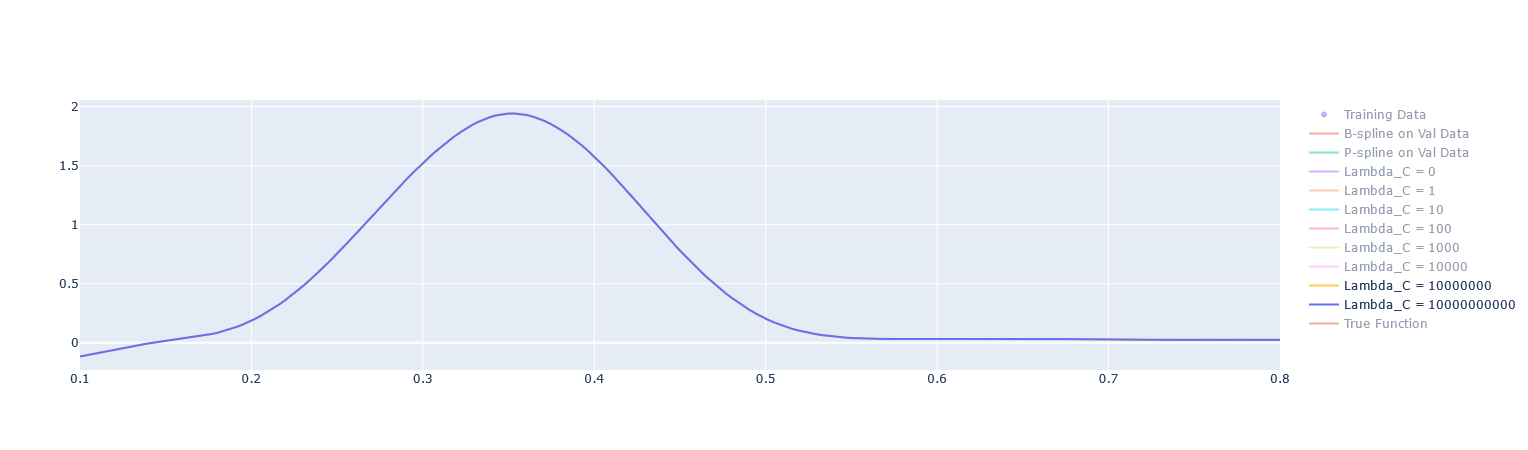

In [273]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="Training Data"))
fig.add_trace(go.Scatter(x=xplot, y=Bspline_plot, mode="lines", name="B-spline on Val Data"))
fig.add_trace(go.Scatter(x=xplot, y=Pspline_plot, mode="lines+markers", marker=dict(size=1), name="P-spline on Val Data"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot0, mode="lines", name="Lambda_C = 0"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot1, mode="lines", name="Lambda_C = 1"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot10, mode="lines", name="Lambda_C = 10"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot100, mode="lines", name="Lambda_C = 100"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot1000, mode="lines", name="Lambda_C = 1000"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot10000, mode="lines", name="Lambda_C = 10000"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot10000000, mode="lines", name=f"Lambda_C = {t_lam[-2]}"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot10000000000, mode="lines", name=f"Lambda_C = {t_lam[-1]}"))

fig.add_trace(go.Scatter(x=x, y=ytrue, mode="lines", name="True Function"))


In [274]:
df_mse = pd.DataFrame(columns=["Model", "MSEVal", "MSEValTrueFunction"])
df_mse["Model"] = ["B-spline", "P-spline"] + [s.split("_")[-1] for s in list(sol_c.keys())]
df_mse["MSEValTrueFunction"] = [
    mean_squared_error(df_test["ytrue"].values, Bspline_pred).round(6),
    mean_squared_error(df_test["ytrue"].values, Pspline_pred).round(6)] + [mean_squared_error(df_test["ytrue"].values, v).round(6) for k,v in SCPspline_pred_c.items()]

df_mse["MSEVal"] = [
    mean_squared_error(df_test["y"].values, Bspline_pred).round(6),
    mean_squared_error(df_test["y"].values, Pspline_pred).round(6)] + [mean_squared_error(df_test["y"].values, B.predict(df_test["x"], v["coef_"], v["knots"])).round(6) for k,v in sol_c.items()]

df_info = pd.DataFrame(columns=["Info", "Value"])
df_info["Info"] = ["Nr_splines", "Knot_type", "Spline_Order", "Opt_Lambda", "Lambda_c"]
lams = [v["lambdas"][1] for k,v in sol_c.items()]
df_info["Value"] = [nr_splines, knot_type, spline_order, opt_lam, lams]

df_plot = pd.DataFrame(data=dict(xplot=xplot, yplot=y, 
                                Bspline_fit=Bspline_plot,
                                Pspline_fit=Pspline_plot,
                                c0=SCPspline_plot0, c1=SCPspline_plot1, 
                                c10=SCPspline_plot10, c100=SCPspline_plot100, 
                                c1000=SCPspline_plot1000, c10000=SCPspline_plot10000))

#df_info.to_csv(savePath+"info.txt", sep=" ", index=False)
#df_mse.to_csv(savePath+"mse.csv", sep=",", index=False)
#df_plot.to_csv(savePath+"data.txt", sep=" ", index=0)

---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----


---
## **L-curve**


### generate peak data

In [6]:
savePath = os.path.join(os.path.dirname("."), '../../Thesis/tex/graphics/data/cha4/lambdas/')
print("Generate some data for the experiment: L-curve")
np.random.seed(2)
n_data = 200
#x = np.random.random(n_data)*10
x = np.linspace(0.1,0.8,n_data)
ytrue = 2*np.exp(-(x-0.35)**2/0.01)
noise = np.random.normal(loc=0, scale=0.1, size=x.shape)
y = ytrue + noise

# train-test split
df = pd.DataFrame(data=dict(x=x, y=y, ytrue=ytrue))
df_train, df_test = train_test_split(df)

px.scatter(df_train, x="x", y="y")
print("Fit the different spline types")
nr_splines, knot_type, spline_order, lam_c = 45, "e", 3, 6000
B = Bspline()

Generate some data for the experiment: L-curve
Fit the different spline types


### generate the test $\lambda_c$

In [204]:
test_lam = np.logspace(start=0.01, stop=4, num=25)
test_lam

### calculate the SC-P-spline fits

In [8]:
sol_Lcurve= {}
Lcurve_MSE = []
Lcurve_MSE_trueFunc = []
# fit the SCP-splines
for c in test_lam:
    sol_Lcurve["sol_c"+str(c)] = B.fit_SC_Pspline(df_train["x"].values, df_train["y"].values, "peak", nr_splines, lam_c=c, knot_type=knot_type)
    
# make predictions for test data
preds_Lcurve = dict()
for k,v in sol_Lcurve.items():
    preds_Lcurve[k.split("_")[-1]] = B.predict(df_test["x"].values, v["coef_"], v["knots"])
    
# calculate the residual norm
for k,v in preds_Lcurve.items():
    Lcurve_MSE.append(np.sum((df_test["y"].values - v)**2))
    Lcurve_MSE_trueFunc.append(np.sum((df_test["ytrue"].values - v)**2))
        

 41%|█████████████████████████████████████████████████████████████████████████████                                                                                                               | 41/100 [00:00<00:00, 402.85it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110141--------


 39%|█████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 39/100 [00:00<00:00, 384.74it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110152--------


 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 395.91it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110168--------


 38%|███████████████████████████████████████████████████████████████████████▍                                                                                                                    | 38/100 [00:00<00:00, 376.16it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110189--------


 38%|███████████████████████████████████████████████████████████████████████▍                                                                                                                    | 38/100 [00:00<00:00, 377.61it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110217--------


 38%|███████████████████████████████████████████████████████████████████████▍                                                                                                                    | 38/100 [00:00<00:00, 371.87it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110254--------


 32%|████████████████████████████████████████████████████████████▏                                                                                                                               | 32/100 [00:00<00:00, 310.61it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110301--------


 37%|█████████████████████████████████████████████████████████████████████▌                                                                                                                      | 37/100 [00:00<00:00, 361.72it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110355--------


 39%|█████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 39/100 [00:00<00:00, 379.39it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110416--------
======== Iteration 2 =========
-------MSE = 0.0110414--------


 38%|███████████████████████████████████████████████████████████████████████▍                                                                                                                    | 38/100 [00:00<00:00, 376.50it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110479--------
======== Iteration 2 =========
-------MSE = 0.0110476--------


 37%|█████████████████████████████████████████████████████████████████████▌                                                                                                                      | 37/100 [00:00<00:00, 367.25it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
--------MSE = 0.011054--------
======== Iteration 2 =========
-------MSE = 0.0110538--------


 43%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 43/100 [00:00<00:00, 376.92it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110596--------
======== Iteration 2 =========
-------MSE = 0.0110595--------


 34%|███████████████████████████████████████████████████████████████▉                                                                                                                            | 34/100 [00:00<00:00, 339.02it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110643--------
======== Iteration 2 =========
-------MSE = 0.0110646--------


 35%|█████████████████████████████████████████████████████████████████▊                                                                                                                          | 35/100 [00:00<00:00, 311.40it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110681--------
======== Iteration 2 =========
-------MSE = 0.0110688--------


 35%|█████████████████████████████████████████████████████████████████▊                                                                                                                          | 35/100 [00:00<00:00, 349.92it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110711--------
======== Iteration 2 =========
-------MSE = 0.0110722--------


 37%|█████████████████████████████████████████████████████████████████████▌                                                                                                                      | 37/100 [00:00<00:00, 366.26it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110733--------
======== Iteration 2 =========
-------MSE = 0.0110748--------


 37%|█████████████████████████████████████████████████████████████████████▌                                                                                                                      | 37/100 [00:00<00:00, 366.25it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110749--------
======== Iteration 2 =========
-------MSE = 0.0110767--------


 39%|█████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 39/100 [00:00<00:00, 382.27it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
--------MSE = 0.011076--------
======== Iteration 2 =========
-------MSE = 0.0110782--------


 38%|███████████████████████████████████████████████████████████████████████▍                                                                                                                    | 38/100 [00:00<00:00, 379.95it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110768--------
======== Iteration 2 =========
-------MSE = 0.0110792--------


 36%|███████████████████████████████████████████████████████████████████▋                                                                                                                        | 36/100 [00:00<00:00, 359.92it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110774--------
======== Iteration 2 =========
-------MSE = 0.0110799--------


 38%|███████████████████████████████████████████████████████████████████████▍                                                                                                                    | 38/100 [00:00<00:00, 376.30it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110778--------
======== Iteration 2 =========
-------MSE = 0.0110803--------


 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 390.11it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110781--------
======== Iteration 2 =========
-------MSE = 0.0110807--------


 38%|███████████████████████████████████████████████████████████████████████▍                                                                                                                    | 38/100 [00:00<00:00, 376.15it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110782--------
======== Iteration 2 =========
-------MSE = 0.0110809--------


 35%|█████████████████████████████████████████████████████████████████▊                                                                                                                          | 35/100 [00:00<00:00, 346.45it/s]

========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110784--------
======== Iteration 2 =========
-------MSE = 0.0110811--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 372.53it/s]


========Pre-Iteration=========
-------MSE = 0.0110116--------
======== Iteration 1 =========
-------MSE = 0.0110785--------
======== Iteration 2 =========
-------MSE = 0.0110812--------
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----


### plot and save

In [15]:
sol_norm = []
res = Lcurve_MSE
res_trueFunc = Lcurve_MSE_trueFunc
for k in sol_Lcurve.keys():
    sol_norm.append(np.sum(sol_Lcurve[k]["coef_"]**2))

df_Lcurve = pd.DataFrame(data=dict(residual=res, residual_trueFunc=res_trueFunc, solution_norm=sol_norm, lam_c=test_lam), dtype=np.float64)
df_Lcurve.to_csv(savePath+"Lcurve.txt", sep=" ", index=False)

In [15]:
fig, (ax, ax2) = plt.subplots(1, 2)
cmap = plt.get_cmap("Spectral")
norm = plt.Normalize(test_lam.min(), test_lam.max())

i = 0
ax.scatter(x=res[i:], y=sol_norm[i:], c=np.log(test_lam[i:]), s=250, marker="*", cmap=cmap)
ax.plot(res[i:], sol_norm[i:])
ax.set_xscale("log")
ax.set_yscale("log")
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)


min_idx = np.argmin(res)
#ax.scatter(res[min_idx], sol_norm[min_idx], c="red")
ax.set_xlabel("Residuum")
ax.set_ylabel("Norm of solution coefficients")
ax.grid(which="both")
ax.set_title("Evaluated on noisy function values")

ax2.scatter(res_trueFunc[i:], sol_norm[i:], c=np.log(test_lam[i:]) / 19, s=150, marker="*", cmap=cmap)
ax2.set_xscale("log")
ax2.set_yscale("log")
sm2 =  ScalarMappable(norm=norm, cmap=cmap)
sm2.set_array([])
cbar = fig.colorbar(sm2, ax=ax2)
ax2.set_title("Evaluated on true function values")

min_idx = np.argmin(res)
ax.scatter(res[min_idx-3:min_idx+3], sol_norm[min_idx-3:min_idx+3], c="red")
ax2.set_xlabel("Residuum")
ax2.set_ylabel("Norm of solution coefficients")
ax2.grid(which="both")


fig.set_figheight(10)
fig.set_figwidth(26)
plt.show()

---
## **Increasing Function, Decreasing Behaviour**

Generate some data for the experiment: Increasing Data vs. Decreasing Behavior


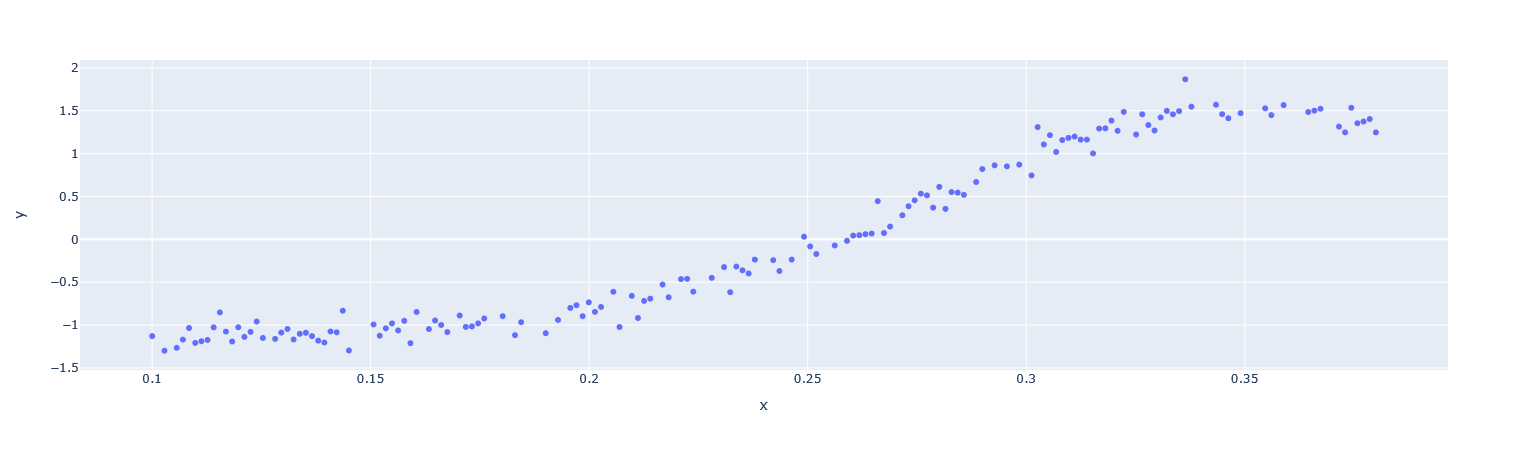

Fit the different spline types


In [131]:
savePath = os.path.join(os.path.dirname("."), '../../Thesis/tex/graphics/data/cha4/inc_data_dec_behav/')
print("Generate some data for the experiment: Increasing Data vs. Decreasing Behavior")
np.random.seed(2)
n_data = 200
#x = np.random.random(n_data)*10
x = np.linspace(0.1,0.38,n_data)
ytrue = 2*np.exp(-(x-0.35)**2/0.01)
#ytrue = (ytrue - ytrue.mean()) / ytrue.std()
noise = np.random.normal(loc=0, scale=0.1, size=x.shape)
y = ytrue + noise


# train-test split
df = pd.DataFrame(data=dict(x=x, y=y, ytrue=ytrue))
df_train, df_test = train_test_split(df)

px.scatter(df_train, x="x", y="y").show()
print("Fit the different spline types")
nr_splines, knot_type, spline_order, lam_c = 45, "e", 3, 6000
B = Bspline()

### generate some test $\lambda_c$

In [132]:
test_lam = np.logspace(start=1, stop=18, num=18)
test_lam

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18])

### fit the SC-P-splines

In [133]:
sol_WrongBehav = {}
WrongBehav_MSE = []
WrongBehav_MSE_trueFunc = []
# fit the SCP-splines
for c in test_lam:
    sol_WrongBehav["sol_c"+str(int(c))] = B.fit_SC_Pspline(df_train["x"].values, df_train["y"].values, "dec", nr_splines, lam_c=c, knot_type=knot_type)
    
# make predictions for test data
preds_WrongBehav = dict()
for k,v in sol_WrongBehav.items():
    preds_WrongBehav[k.split("_")[-1]] = B.predict(df_test["x"].values, v["coef_"], v["knots"])
    
# calculate the residual norm
for k,v in preds_WrongBehav.items():
    WrongBehav_MSE.append(np.sum((df_test["y"].values - v)**2))
    WrongBehav_MSE_trueFunc.append(np.sum((df_test["ytrue"].values - v)**2))
        

 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 393.18it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.0122323--------
======== Iteration 2 =========
-------MSE = 0.0122247--------


 39%|█████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 39/100 [00:00<00:00, 388.81it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.0423315--------
======== Iteration 2 =========
-------MSE = 0.0397936--------


 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 395.64it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.3853333--------
======== Iteration 2 =========
-------MSE = 0.4093691--------


 41%|█████████████████████████████████████████████████████████████████████████████                                                                                                               | 41/100 [00:00<00:00, 404.57it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.7944406--------
======== Iteration 2 =========
-------MSE = 0.9242813--------


 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 399.50it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.8725817--------
======== Iteration 2 =========
-------MSE = 1.0294707--------


 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 392.87it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.8810664--------
======== Iteration 2 =========
-------MSE = 1.0410146--------


 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 396.62it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.8819221--------
======== Iteration 2 =========
-------MSE = 1.0421802--------


 39%|█████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 39/100 [00:00<00:00, 386.33it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.8820077--------
======== Iteration 2 =========
-------MSE = 1.0422968--------


 41%|█████████████████████████████████████████████████████████████████████████████                                                                                                               | 41/100 [00:00<00:00, 404.35it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.8820163--------
======== Iteration 2 =========
-------MSE = 1.0423085--------


 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 396.26it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.8820172--------
======== Iteration 2 =========
-------MSE = 1.0423097--------


 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 394.13it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.8820172--------
======== Iteration 2 =========
-------MSE = 1.0423098--------


 39%|█████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 39/100 [00:00<00:00, 382.05it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.8820173--------
======== Iteration 2 =========
-------MSE = 1.0423098--------


 41%|█████████████████████████████████████████████████████████████████████████████                                                                                                               | 41/100 [00:00<00:00, 403.22it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.8820169--------
======== Iteration 2 =========
-------MSE = 1.0423098--------


 41%|█████████████████████████████████████████████████████████████████████████████                                                                                                               | 41/100 [00:00<00:00, 400.10it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.8820071--------
======== Iteration 2 =========
-------MSE = 1.0423098--------


 39%|█████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 39/100 [00:00<00:00, 380.90it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 0.9911523--------
======== Iteration 2 =========
-------MSE = 1.0387219--------
======== Iteration 3 =========
-------MSE = 1.0373693--------
======== Iteration 4 =========
-------MSE = 1.0428446--------


 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 395.38it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 1.0426019--------
======== Iteration 2 =========
-------MSE = 1.0393469--------
======== Iteration 3 =========
-------MSE = 1.0427883--------
======== Iteration 4 =========
-------MSE = 1.0428446--------


 40%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                | 40/100 [00:00<00:00, 397.29it/s]

========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 1.0430241--------
======== Iteration 2 =========
-------MSE = 1.0428446--------
======== Iteration 3 =========
-------MSE = 1.0428446--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 385.96it/s]


========Pre-Iteration=========
-------MSE = 0.0113067--------
======== Iteration 1 =========
-------MSE = 1.0428446--------
======== Iteration 2 =========
-------MSE = 1.0428446--------
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----


### plotting results

Knot type:  e
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----


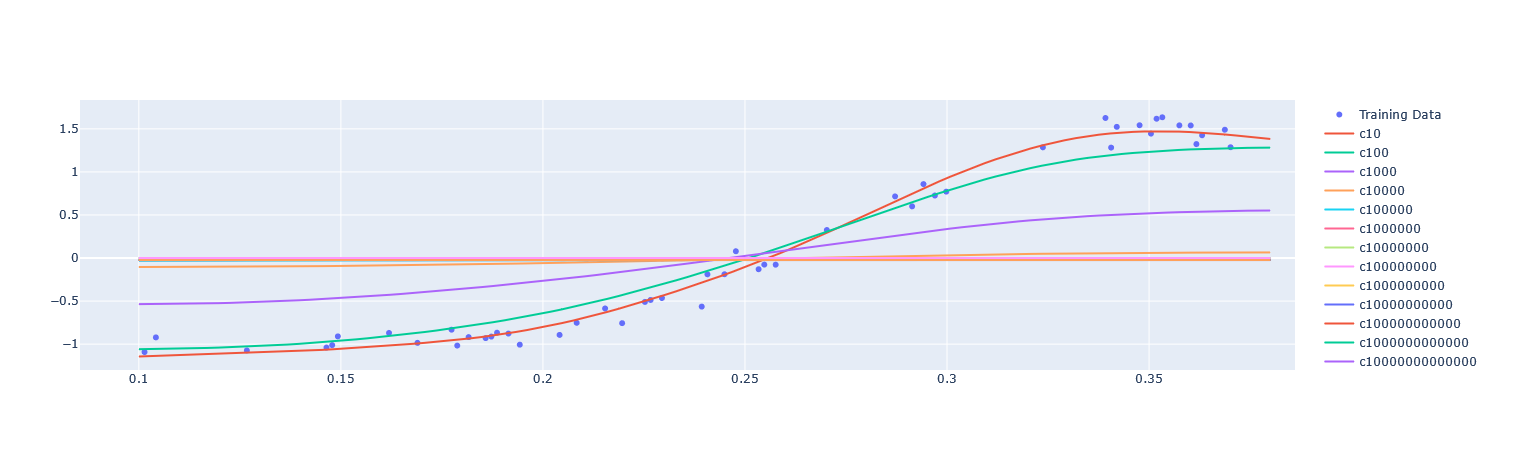

In [134]:
fig = go.Figure()
print("Knot type: ", knot_type)

# add the predictions to the dataset and save it
xplot = np.linspace(0.1,0.38,100)
yplot = 2*np.exp(-(xplot-0.35)**2/0.01) 

plot_WrongBehav = {}
for k,v in sol_WrongBehav.items():
    plot_WrongBehav[k.split("_")[-1]] = B.predict(xplot, v["coef_"], v["knots"])

fig.add_trace(go.Scatter(x=df_test["x"], y=df_test["y"], mode="markers", name="Training Data"))
for k,v in plot_WrongBehav.items():
    fig.add_trace(go.Scatter(x=xplot, y=v, mode="lines", name=k))
fig.show()


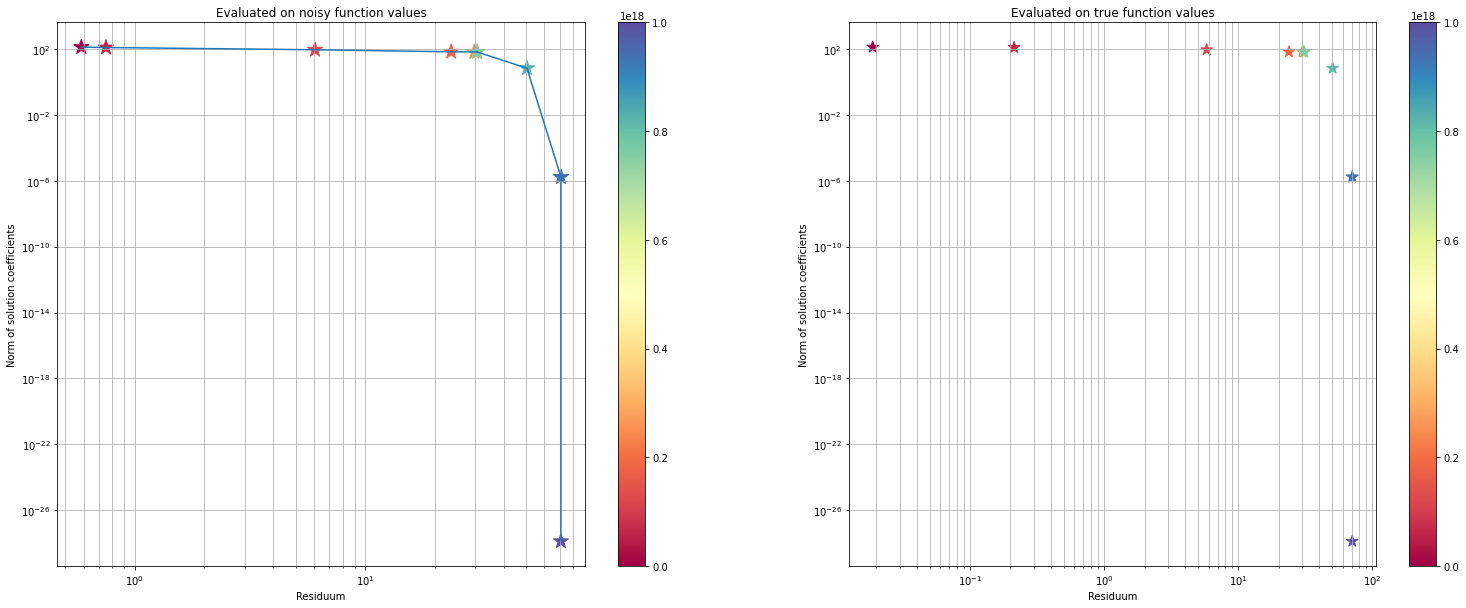

In [117]:
sol_norm = []
res = WrongBehav_MSE
res_trueFunc = WrongBehav_MSE_trueFunc
for k in sol_WrongBehav.keys():
    sol_norm.append(np.sum(sol_WrongBehav[k]["coef_"]**2))

fig, (ax, ax2) = plt.subplots(1, 2)
cmap = plt.get_cmap("Spectral")
norm = plt.Normalize(test_lam.min(), test_lam.max())

i = 0
ax.scatter(x=res[i:], y=sol_norm[i:], c=np.log(test_lam[i:]), s=250, marker="*", cmap=cmap)
ax.plot(res[i:], sol_norm[i:])
ax.set_xscale("log")
ax.set_yscale("log")
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)


min_idx = np.argmin(res)
#ax.scatter(res[min_idx], sol_norm[min_idx], c="red")
ax.set_xlabel("Residuum")
ax.set_ylabel("Norm of solution coefficients")
ax.grid(which="both")
ax.set_title("Evaluated on noisy function values")

ax2.scatter(res_trueFunc[i:], sol_norm[i:], c=np.log(test_lam[i:]) / 19, s=150, marker="*", cmap=cmap)
ax2.set_xscale("log")
ax2.set_yscale("log")
sm2 =  ScalarMappable(norm=norm, cmap=cmap)
sm2.set_array([])
cbar = fig.colorbar(sm2, ax=ax2)
ax2.set_title("Evaluated on true function values")

min_idx = np.argmin(res)
ax.scatter(res[min_idx-3:min_idx+3], sol_norm[min_idx-3:min_idx+3], c="red")
ax2.set_xlabel("Residuum")
ax2.set_ylabel("Norm of solution coefficients")
ax2.grid(which="both")


fig.set_figheight(10)
fig.set_figwidth(26)
plt.show()

### save data and fits

In [128]:
# save data
df.to_csv(savePath+"data.txt", sep=" ", index=False)
# save fits
df_plot_WrongBehave = pd.DataFrame(data=plot_WrongBehav)
df_plot_WrongBehave["x"] = xplot
df_plot_WrongBehave["ytrue"] = yplot
df_plot_WrongBehave.to_csv(savePath+"fits.txt", sep=" ", index=False)

In [118]:
xplot = np.linspace(0.1,0.38, 100)


,x,y,ytrue
0,0.100000,-0.037815,0.003861
1,0.101407,-0.001485,0.004141
2,0.102814,-0.209179,0.004441
3,0.104221,0.168787,0.004760
4,0.105628,-0.174244,0.005099
...,...,...,...
195,0.374372,2.065110,1.884662
196,0.375779,1.889451,1.871410
197,0.377186,1.912832,1.857515
198,0.378593,1.946297,1.842994


In [ ]:
df_WrongBehav = pd.DataFrame(data=preds_WrongBehav)
df_WrongBehav["x"] = df_test["x"].values
df_WrongBehav["y"] = df_test["y"].values
df_WrongBehav.to_csv(savePath+"WrongBehav.txt", sep=" ", index=False)
df

---
## **Peak Example for Sparse Data in Chapter 4**

In [ ]:
savePath = os.path.join(os.path.dirname("."), '../../Thesis/tex/graphics/data/cha4/sparse_example/')
print("Generate sparse data")
np.random.seed(2)
n_data = 200
x1 = np.linspace(0.1,0.2, 30)
x2 = np.linspace(0.2,0.5, 10)
x3 = np.linspace(0.5,0.8, 30)
x = np.hstack((x1,x2,x3))

ytrue = 2*np.exp(-(x-0.35)**2/0.01) 
noise = np.random.normal(loc=0, scale=0.1, size=x.shape)
y = ytrue + noise

# train-test split
df = pd.DataFrame(data=dict(x=x, y=y, ytrue=ytrue))
df_train, df_test = train_test_split(df)

px.scatter(df_train, x="x", y="y")

In [ ]:
print("Fit the different spline types")
nr_splines, knot_type, spline_order, lam_c = 30, "q", 3, 1000
B = Bspline()
sol = B.fit(df_train["x"].values, df_train["y"].values, nr_splines=nr_splines, knot_type=knot_type)
opt_lam = B.calc_GCV(df_train["x"].values, df_train["y"].values,nr_splines=nr_splines, nr_lam=100, plot_=0, knot_type=knot_type)["best_lambda"]
print("Optimal lambda = ",opt_lam)
sol_p = B.fit_Pspline(df_train["x"].values, df_train["y"].values,nr_splines=nr_splines,lam=opt_lam, knot_type=knot_type)
sol_c = B.fit_SC_Pspline(df_train["x"].values, df_train["y"].values, "peak", nr_splines, lam_c=lam_c, knot_type=knot_type)

In [ ]:
print("Show the mean squared errors")
Bspline_pred = B.predict(df_test["x"].values, sol["coef_"], sol["knots"])
Pspline_pred = B.predict(df_test["x"].values, sol_p["coef_"], sol_p["knots"])
SCPspline_pred = B.predict(df_test["x"].values, sol_c["coef_"], sol_c["knots"])

print("".center(50,"="))
print("".center(50,"="))
print("MSEs compared to True Function")
print("".center(50,"="))
print("Validation Set".center(30, " "))
print("MSE-Val B-spline = ".ljust(25), mean_squared_error(df_test["ytrue"].values, Bspline_pred).round(6))
print("MSE-Val P-spline = ".ljust(25), mean_squared_error(df_test["ytrue"].values, Pspline_pred).round(6))
print("MSE-Val SC-P-spline = ".ljust(25), mean_squared_error(df_test["ytrue"].values, SCPspline_pred).round(6))
print("".center(50,"="))
print("Train Set".center(30, " "))
print("MSE-Train B-spline = ".ljust(25), mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol["coef_"], sol["knots"])).round(6))
print("MSE-Train P-spline = ".ljust(25), mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol_p["coef_"], sol_p["knots"])).round(6))
print("MSE-Train SC-P-spline = ".ljust(25), mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol_c["coef_"], sol_c["knots"])).round(6))
print("".center(50,"="))
print("MSEs compared to Noisy Function")
print("".center(50,"="))
print("Validation Set".center(30, " "))
print("MSE-Val B-spline = ".ljust(25), mean_squared_error(df_test["y"].values, Bspline_pred).round(6))
print("MSE-Val P-spline = ".ljust(25), mean_squared_error(df_test["y"].values, Pspline_pred).round(6))
print("MSE-Val SC-P-spline = ".ljust(25), mean_squared_error(df_test["y"].values, SCPspline_pred).round(6))
print("".center(50,"="))
print("Train set".center(30, " "))
print("MSE-Train B-spline = ".ljust(25), mean_squared_error(df_train["y"].values, B.predict(df_train["x"].values, sol["coef_"], sol["knots"])).round(6))
print("MSE-Train P-spline = ".ljust(25), mean_squared_error(df_train["y"].values, B.predict(df_train["x"].values, sol_p["coef_"], sol_p["knots"])).round(6))
print("MSE-Train SC-P-spline = ".ljust(25), mean_squared_error(df_train["y"].values, B.predict(df_train["x"].values, sol_c["coef_"], sol_c["knots"])).round(6))
print("".center(50,"="))

In [ ]:
# add the predictions to the dataset and save it
xplot = np.linspace(0.1,0.8,1000)
yplot = 2*np.exp(-(xplot-0.35)**2/0.01) 
Bspline_plot = B.predict(xplot, sol["coef_"], sol["knots"])
Pspline_plot = B.predict(xplot, sol_p["coef_"], sol_p["knots"])
SCPspline_plot = B.predict(xplot, sol_c["coef_"], sol_c["knots"])

In [ ]:
fig = go.Figure()
print("Knot type: ", knot_type)
fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="Training Data"))
fig.add_trace(go.Scatter(x=xplot, y=Bspline_plot, mode="lines", name="B-spline on Val Data"))
fig.add_trace(go.Scatter(x=xplot, y=Pspline_plot, mode="lines+markers", name="P-spline on Val Data"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot, mode="lines", name="SC-P-spline on Val Data"))
fig.add_trace(go.Scatter(x=xplot, y=yplot, mode="lines", name="True Function"))
fig.update_yaxes(range=[-2, 4])

In [ ]:
df_mse = pd.DataFrame(columns=["Model", "MSEVal", "MSEValTrueFunction"])
df_mse["Model"] = ["B-spline", "P-spline", "SCP-spline"]
df_mse["MSEValTrueFunction"] = [
    mean_squared_error(df_test["ytrue"].values, Bspline_pred).round(6),
    mean_squared_error(df_test["ytrue"].values, Pspline_pred).round(6),
    mean_squared_error(df_test["ytrue"].values, SCPspline_pred).round(6)]
df_mse["MSEVal"] = [
    mean_squared_error(df_test["y"].values, Bspline_pred).round(6),
    mean_squared_error(df_test["y"].values, Pspline_pred).round(6),
    mean_squared_error(df_test["y"].values, SCPspline_pred).round(6)
]

df_info = pd.DataFrame(columns=["Info", "Value"])
df_info["Info"] = ["Nr_splines", "Knot_type", "Spline_Order", "Opt_Lambda", "Lambda_c"]
df_info["Value"] = [nr_splines, knot_type, spline_order, opt_lam, lam_c]
df_plot_fit = pd.DataFrame(data=dict(xplot=xplot, yplot=yplot,
                                     Bspline_fit=Bspline_plot,
                                     Pspline_fit=Pspline_plot,
                                     SCP_spline_fit=SCPspline_plot))
df_plot_data = pd.DataFrame(data=dict(x=x, y=y))

#df_mse.to_csv(savePath+f"mse-{knot_type}.csv", sep=",", index=False)
#df_info.to_csv(savePath+f"info-{knot_type}.txt", sep=" ", index=False)
#df_plot_data.to_csv(savePath+f"data-{knot_type}.txt", sep=" ", index=False)
#df_plot_fit.to_csv(savePath+f"fit-{knot_type}.txt", sep=" ", index=False)

---
## **Heaviside Function**

Generate sparse data


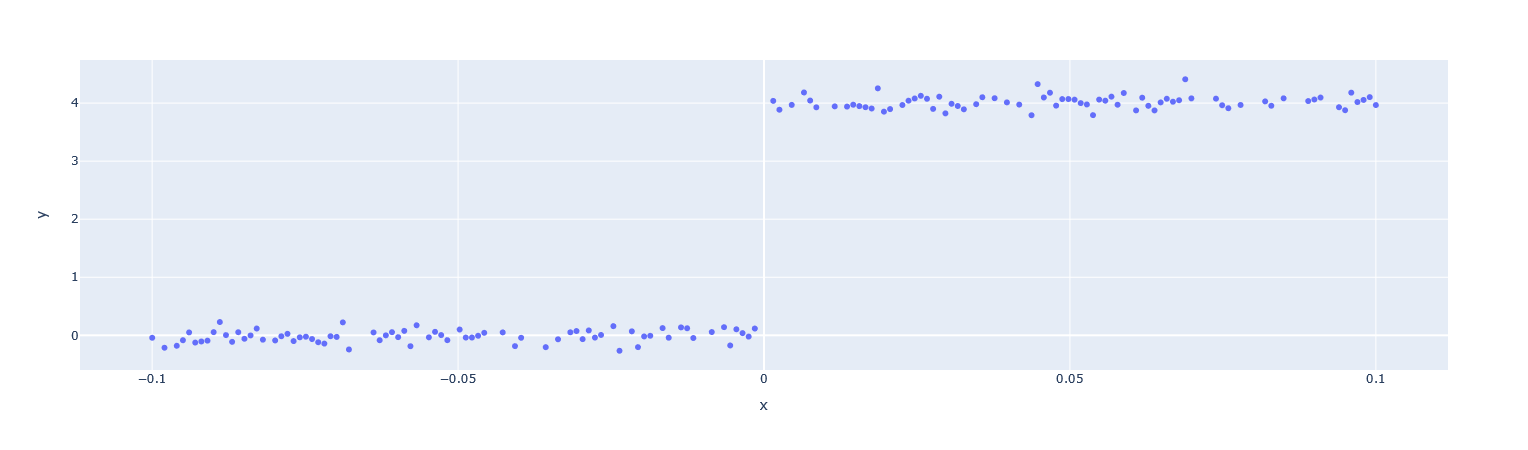

In [168]:
savePath = os.path.join(os.path.dirname("."), '../../Thesis/tex/graphics/data/cha4/heaviside/')
print("Generate sparse data")
np.random.seed(2)
n_data = 200
x = np.linspace(-0.1,0.1, n_data)
ytrue = 4*np.heaviside(x, 0) 
noise = np.random.normal(loc=0, scale=0.1, size=x.shape)
y = ytrue + noise

# train-test split
df = pd.DataFrame(data=dict(x=x, y=y, ytrue=ytrue))
df_train, df_test = train_test_split(df)

px.scatter(df_train, x="x", y="y")

### Fit various models

In [197]:
opt_lam

0.0200923300256505

In [177]:
print("Fit the different spline types")
nr_splines, knot_type, spline_order, lam_c = 100, "e", 3, 6000
B = Bspline()
sol = B.fit(df_train["x"].values, df_train["y"].values, nr_splines=nr_splines, knot_type=knot_type)
opt_lam = B.calc_GCV(df_train["x"].values, df_train["y"].values,nr_splines=nr_splines, nr_lam=100, plot_=0, knot_type=knot_type)["best_lambda"]
print("Optimal lambda = ",opt_lam)
sol_p = B.fit_Pspline(df_train["x"].values, df_train["y"].values,nr_splines=nr_splines,lam=opt_lam, knot_type=knot_type)
sol_c = B.fit_SC_Pspline(df_train["x"].values, df_train["y"].values, "inc", nr_splines, lam_c=lam_c, knot_type=knot_type)

 11%|████████████████████▋                                                                                                                                                                       | 11/100 [00:00<00:00, 105.75it/s]

Fit the different spline types


 11%|████████████████████▋                                                                                                                                                                       | 11/100 [00:00<00:00, 107.81it/s]

Optimal lambda =  0.0200923300256505


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 102.23it/s]


========Pre-Iteration=========
-------MSE = 0.0085982--------
======== Iteration 1 =========
-------MSE = 0.0109988--------
======== Iteration 2 =========
-------MSE = 0.0120473--------
======== Iteration 3 =========
-------MSE = 0.0125912--------
======== Iteration 4 =========
--------MSE = 0.012611--------
======== Iteration 5 =========
-------MSE = 0.0126112--------


In [178]:
print("Show the mean squared errors")
Bspline_pred = B.predict(df_test["x"].values, sol["coef_"], sol["knots"])
Pspline_pred = B.predict(df_test["x"].values, sol_p["coef_"], sol_p["knots"])
SCPspline_pred = B.predict(df_test["x"].values, sol_c["coef_"], sol_c["knots"])

print("".center(50,"="))
print("".center(50,"="))
print("MSEs compared to True Function")
print("".center(50,"="))
print("Validation Set".center(30, " "))
print("MSE-Val B-spline = ".ljust(25), mean_squared_error(df_test["ytrue"].values, Bspline_pred).round(6))
print("MSE-Val P-spline = ".ljust(25), mean_squared_error(df_test["ytrue"].values, Pspline_pred).round(6))
print("MSE-Val SC-P-spline = ".ljust(25), mean_squared_error(df_test["ytrue"].values, SCPspline_pred).round(6))
print("".center(50,"="))
print("Train Set".center(30, " "))
print("MSE-Train B-spline = ".ljust(25), mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol["coef_"], sol["knots"])).round(6))
print("MSE-Train P-spline = ".ljust(25), mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol_p["coef_"], sol_p["knots"])).round(6))
print("MSE-Train SC-P-spline = ".ljust(25), mean_squared_error(df_train["ytrue"].values, B.predict(df_train["x"].values, sol_c["coef_"], sol_c["knots"])).round(6))
print("".center(50,"="))
print("MSEs compared to Noisy Function")
print("".center(50,"="))
print("Validation Set".center(30, " "))
print("MSE-Val B-spline = ".ljust(25), mean_squared_error(df_test["y"].values, Bspline_pred).round(6))
print("MSE-Val P-spline = ".ljust(25), mean_squared_error(df_test["y"].values, Pspline_pred).round(6))
print("MSE-Val SC-P-spline = ".ljust(25), mean_squared_error(df_test["y"].values, SCPspline_pred).round(6))
print("".center(50,"="))
print("Train set".center(30, " "))
print("MSE-Train B-spline = ".ljust(25), mean_squared_error(df_train["y"].values, B.predict(df_train["x"].values, sol["coef_"], sol["knots"])).round(6))
print("MSE-Train P-spline = ".ljust(25), mean_squared_error(df_train["y"].values, B.predict(df_train["x"].values, sol_p["coef_"], sol_p["knots"])).round(6))
print("MSE-Train SC-P-spline = ".ljust(25), mean_squared_error(df_train["y"].values, B.predict(df_train["x"].values, sol_c["coef_"], sol_c["knots"])).round(6))
print("".center(50,"="))

Show the mean squared errors
---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----
MSEs compared to True Function
        Validation Set        
MSE-Val B-spline =        0.068082
MSE-Val P-spline =        0.081039
MSE-Val SC-P-spline =     0.073173
          Train Set           
---Prediction for 1-D Data----
MSE-Train B-spline =      0.007019
---Prediction for 1-D Data----
MSE-Train P-spline =      0.006298
---Prediction for 1-D Data----
MSE-Train SC-P-spline =   0.003288
MSEs compared to Noisy Function
        Validation Set        
MSE-Val B-spline =        0.093726
MSE-Val P-spline =        0.111576
MSE-Val SC-P-spline =     0.103914
          Train set           
---Prediction for 1-D Data----
MSE-Train B-spline =      0.004958
---Prediction for 1-D Data----
MSE-Train P-spline =      0.008598
---Prediction for 1-D Data----
MSE-Train SC-P-spline =   0.012611


### Plotting

In [185]:
# add the predictions to the dataset and save it
xplot = np.linspace(-0.1,0.1,1000)
yplot = 4*np.heaviside(xplot, 0) 
Bspline_plot = B.predict(xplot, sol["coef_"], sol["knots"])
Pspline_plot = B.predict(xplot, sol_p["coef_"], sol_p["knots"])
SCPspline_plot = B.predict(xplot, sol_c["coef_"], sol_c["knots"])

---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----


Knot type:  e


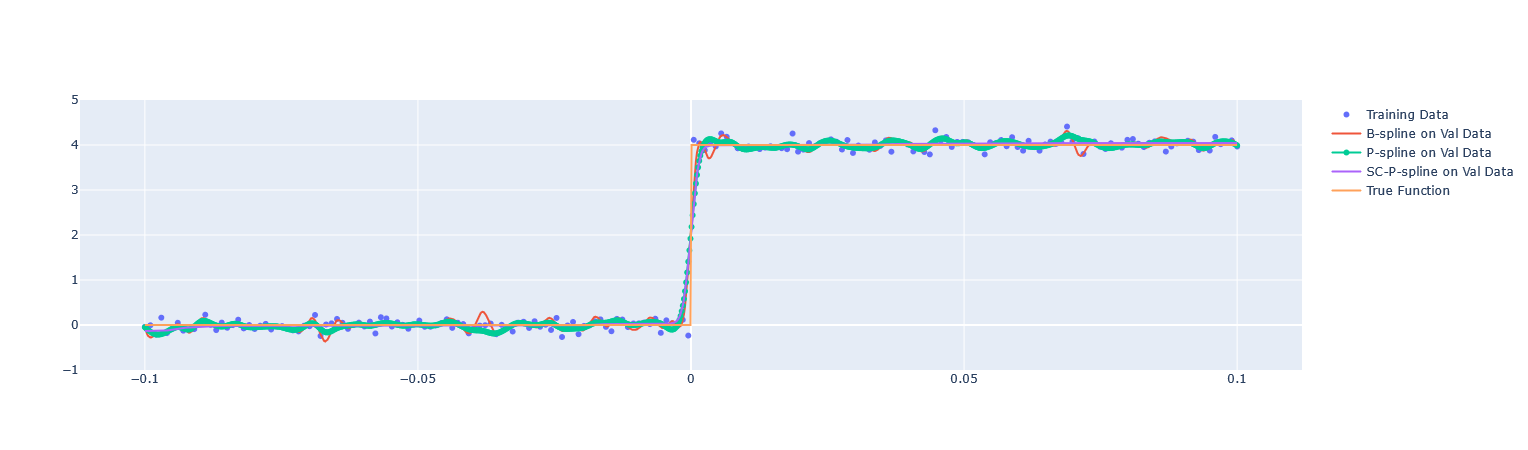

In [186]:
fig = go.Figure()
print("Knot type: ", knot_type)
fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="Training Data"))
fig.add_trace(go.Scatter(x=xplot, y=Bspline_plot, mode="lines", name="B-spline on Val Data"))
fig.add_trace(go.Scatter(x=xplot, y=Pspline_plot, mode="lines+markers", name="P-spline on Val Data"))
fig.add_trace(go.Scatter(x=xplot, y=SCPspline_plot, mode="lines", name="SC-P-spline on Val Data"))
fig.add_trace(go.Scatter(x=xplot, y=yplot, mode="lines", name="True Function"))
fig.update_yaxes(range=[-1, 5])

### saving

In [193]:
df_plot_fit = pd.DataFrame(data=dict(xplot=xplot, ytrue=yplot,
                                     Bspline_fit=Bspline_plot,
                                     Pspline_fit=Pspline_plot,
                                     SCP_spline_fit=SCPspline_plot))

In [195]:
df.to_csv(savePath+f"data.txt", sep=" ", index=False)
df_plot_fit.to_csv(savePath+"fits.txt", sep=" ", index=False)

In [192]:
df_plot_fit

,xplot,ytrue,Bspline_fit,Pspline_fit,SCP_spline_fit
0,-0.100000,0.0,-0.041676,-0.049114,-0.133618
1,-0.099800,0.0,-0.132815,-0.071056,-0.133618
2,-0.099600,0.0,-0.198595,-0.092195,-0.133619
3,-0.099399,0.0,-0.242368,-0.112311,-0.133620
4,-0.099199,0.0,-0.267486,-0.131182,-0.133621
...,...,...,...,...,...
995,0.099199,4.0,4.106310,4.041773,4.043742
996,0.099399,4.0,4.095179,4.031148,4.043748
997,0.099600,4.0,4.070127,4.019225,4.043751
998,0.099800,4.0,4.028262,4.005984,4.043752
